# The wire
## Importation des librairies 

In [55]:
import pandas as pd, numpy as np, os, warnings, seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scapy.all import rdpcap, IP, TCP, UDP, Raw
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

# %matplotlib inline
%pylab inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Importation des données

In [ ]:


# Charger le fichier pcapng
file_path = "wire7.pcapng"  # Remplace par ton fichier
packets = rdpcap(file_path)

# Liste pour stocker les données extraites
packet_data = []

# Parcourir chaque paquet pour extraire les informations
for pkt in packets:
    if IP in pkt:  # Vérifier si c'est un paquet IP
        src_ip = pkt[IP].src
        dst_ip = pkt[IP].dst
        length = len(pkt)
        protocol = "OTHER"
        ttl = pkt[IP].ttl  # Time-To-Live

        # Déterminer le protocole
        src_port = dst_port = "N/A"
        tcp_flags = "N/A"
        content_type = "N/A"
        http_host = "N/A"
        user_agent = "N/A"

        if TCP in pkt:
            protocol = "TCP"
            src_port = pkt[TCP].sport
            dst_port = pkt[TCP].dport
            tcp_flags = pkt[TCP].flags  # Flags TCP (SYN, ACK, FIN, etc.)

            # Extraire les données HTTP (si disponibles)
            if pkt.haslayer(Raw):
                raw_data = pkt[Raw].load.decode(errors="ignore")
                if "Content-Type:" in raw_data:
                    content_type = raw_data.split("Content-Type: ")[1].split("\r\n")[0]
                if "Host:" in raw_data:
                    http_host = raw_data.split("Host: ")[1].split("\r\n")[0]
                if "User-Agent:" in raw_data:
                    user_agent = raw_data.split("User-Agent: ")[1].split("\r\n")[0]

        elif UDP in pkt:
            protocol = "UDP"
            src_port = pkt[UDP].sport
            dst_port = pkt[UDP].dport

        # Ajouter les informations extraites à la liste
        packet_data.append([
            pkt.time, src_ip, dst_ip, protocol, length, ttl,
            src_port, dst_port, tcp_flags, content_type, http_host, user_agent
        ])

# Convertir la liste en DataFrame Pandas
df = pd.DataFrame(packet_data, columns=[
    "Time", "Source IP", "Destination IP", "Protocol", "Length", "TTL",
    "Source Port", "Destination Port", "TCP Flags", "Content-Type", "Host", "User-Agent"
])

df["Time"] = df["Time"].astype(float)  # Convertir en float
df["Time"] = pd.to_datetime(df["Time"], unit="s")  # Conversion correcte


# Afficher les premières lignes du DataFrame


# Sauvegarder le DataFrame en CSV si besoin
df.to_csv("output_packets.csv", index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181620 entries, 0 to 181619
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              181620 non-null  datetime64[ns]
 1   Source IP         181620 non-null  object        
 2   Destination IP    181620 non-null  object        
 3   Protocol          181620 non-null  object        
 4   Length            181620 non-null  int64         
 5   TTL               181620 non-null  int64         
 6   Source Port       181620 non-null  int64         
 7   Destination Port  181620 non-null  int64         
 8   TCP Flags         181620 non-null  object        
 9   Content-Type      181620 non-null  object        
 10  Host              181620 non-null  object        
 11  User-Agent        181620 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 16.6+ MB


In [31]:
df.sample(15)

,Time,Source IP,Destination IP,Protocol,Length,TTL,Source Port,Destination Port,TCP Flags,Content-Type,Host,User-Agent
16772,2025-02-11 20:36:13.308492899,52.143.146.207,192.168.1.63,TCP,1514,54,80,55045,A,N/A,N/A,N/A
91508,2025-02-11 20:36:18.122167110,52.143.146.207,192.168.1.63,TCP,1514,53,80,55043,PA,N/A,N/A,N/A
78994,2025-02-11 20:36:17.339054108,52.143.146.207,192.168.1.63,TCP,1514,54,80,55045,A,N/A,N/A,N/A
58130,2025-02-11 20:36:15.968059063,52.143.146.207,192.168.1.63,TCP,410,54,80,55045,PA,N/A,N/A,N/A
103239,2025-02-11 20:36:19.070425034,52.143.146.207,192.168.1.63,TCP,1514,53,80,55043,A,N/A,N/A,N/A
171557,2025-02-11 20:36:23.858335018,52.143.146.207,192.168.1.63,TCP,1514,53,80,55043,A,N/A,N/A,N/A
168142,2025-02-11 20:36:23.615549088,52.143.146.207,192.168.1.63,TCP,1514,54,80,55045,A,N/A,N/A,N/A
98301,2025-02-11 20:36:18.692742109,192.168.1.63,52.143.146.207,TCP,66,128,55043,80,A,N/A,N/A,N/A
143903,2025-02-11 20:36:21.906831026,52.143.146.207,192.168.1.63,TCP,1514,54,80,55045,A,N/A,N/A,N/A
26845,2025-02-11 20:36:13.921514988,52.143.146.207,192.168.1.63,TCP,1514,54,80,55045,A,N/A,N/A,N/A


In [36]:
# Charger le fichier pcapng
file_path = "wire8.pcapng"  # Remplace par ton fichier
packets = rdpcap(file_path)

# Liste pour stocker les données extraites
packet_data = []

# Parcourir chaque paquet pour extraire les informations
for pkt in packets:
    if IP in pkt:  # Vérifier si c'est un paquet IP
        src_ip = pkt[IP].src
        dst_ip = pkt[IP].dst
        length = len(pkt)
        protocol = "OTHER"
        ttl = pkt[IP].ttl  # Time-To-Live

        # Déterminer le protocole
        src_port = dst_port = "N/A"
        tcp_flags = "N/A"
        content_type = "N/A"
        http_host = "N/A"
        user_agent = "N/A"

        if TCP in pkt:
            protocol = "TCP"
            src_port = pkt[TCP].sport
            dst_port = pkt[TCP].dport
            tcp_flags = pkt[TCP].flags  # Flags TCP (SYN, ACK, FIN, etc.)

            # Extraire les données HTTP (si disponibles)
            if pkt.haslayer(Raw):
                raw_data = pkt[Raw].load.decode(errors="ignore")
                if "Content-Type:" in raw_data:
                    content_type_data = raw_data.split("Content-Type: ")
                    if len(content_type_data) > 1:  # Vérifie si le split a bien produit une seconde partie
                        content_type = content_type_data[1].split("\r\n")[0]
                    else:
                         content_type = "N/A"
                if "Host:" in raw_data:
                    http_host = raw_data.split("Host: ")[1].split("\r\n")[0]
                if "User-Agent:" in raw_data:
                    user_agent = raw_data.split("User-Agent: ")[1].split("\r\n")[0]

        elif UDP in pkt:
            protocol = "UDP"
            src_port = pkt[UDP].sport
            dst_port = pkt[UDP].dport

        # Ajouter les informations extraites à la liste
        packet_data.append([
            pkt.time, src_ip, dst_ip, protocol, length, ttl,
            src_port, dst_port, tcp_flags, content_type, http_host, user_agent
        ])

# Convertir la liste en DataFrame Pandas
df2 = pd.DataFrame(packet_data, columns=[
    "Time", "Source IP", "Destination IP", "Protocol", "Length", "TTL",
    "Source Port", "Destination Port", "TCP Flags", "Content-Type", "Host", "User-Agent"
])

df2["Time"] = df2["Time"].astype(float)  # Convertir en float
df2["Time"] = pd.to_datetime(df2["Time"], unit="s")  # Conversion correcte


# Afficher les premières lignes du DataFrame


# Sauvegarder le DataFrame en CSV si besoin
df2.to_csv("output_packets2.csv", index=False)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27676 entries, 0 to 27675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              27676 non-null  datetime64[ns]
 1   Source IP         27676 non-null  object        
 2   Destination IP    27676 non-null  object        
 3   Protocol          27676 non-null  object        
 4   Length            27676 non-null  int64         
 5   TTL               27676 non-null  int64         
 6   Source Port       27676 non-null  int64         
 7   Destination Port  27676 non-null  int64         
 8   TCP Flags         27676 non-null  object        
 9   Content-Type      27676 non-null  object        
 10  Host              27676 non-null  object        
 11  User-Agent        27676 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 2.5+ MB


## scan 1

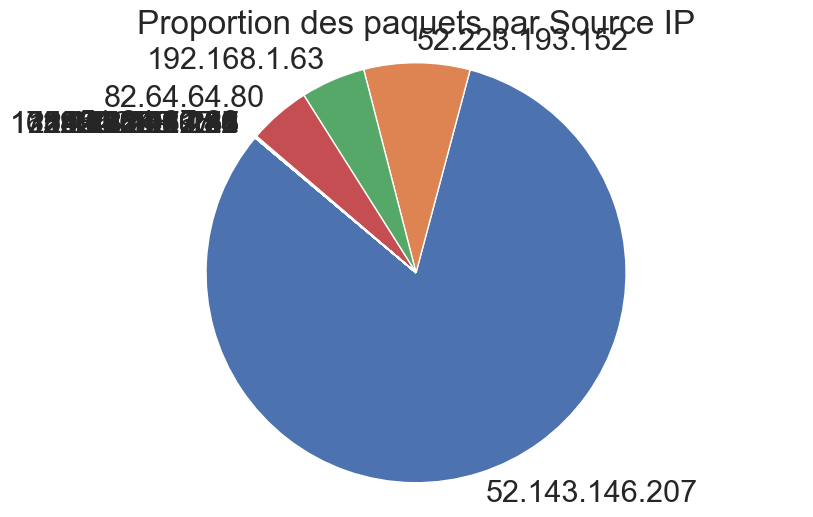

In [32]:
# Compter le nombre de paquets envoyés par chaque Source IP
source_ip_counts = df["Source IP"].value_counts()

# Créer un graphique en camembert
plt.figure(figsize=(10, 6))
plt.pie(source_ip_counts, labels=source_ip_counts.index, startangle=140)
plt.title("Proportion des paquets par Source IP")
plt.axis('equal')  # Assurer un aspect circulaire

# Afficher le graphique
plt.show()

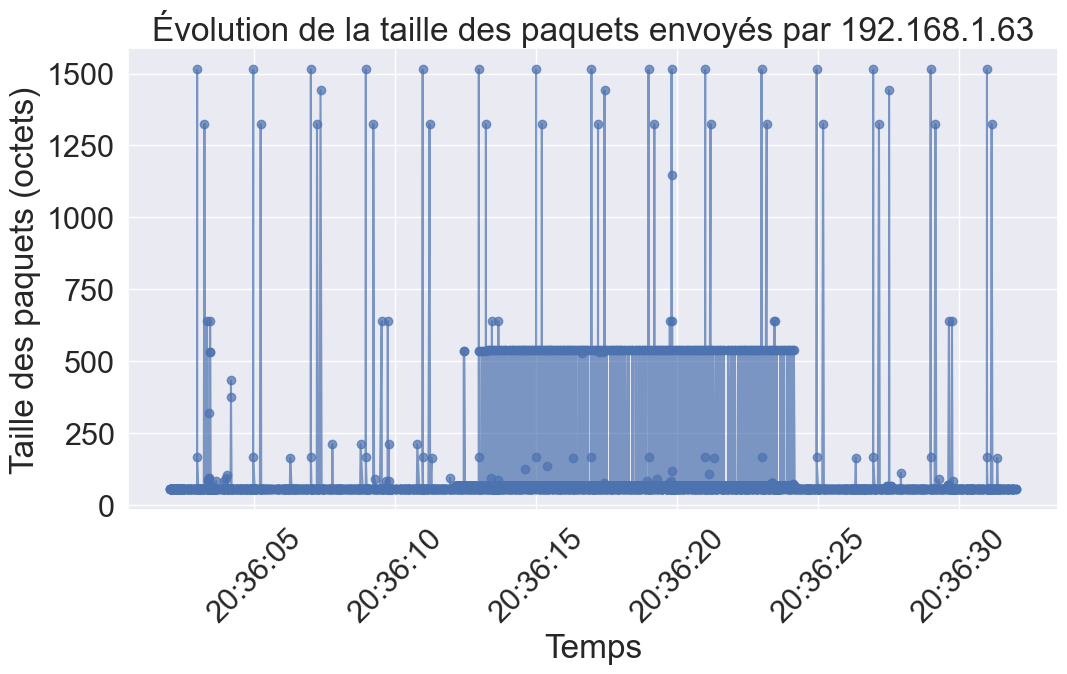

In [49]:
# Définir l'adresse IP source spécifique
specific_ip = "192.168.1.63"  # Remplace par l'IP que tu veux analyser

# Filtrer les paquets envoyés par cette IP
df_filtered = df[df["Source IP"] == specific_ip]

# Vérifier qu'il y a bien des données après filtrage
if df_filtered.empty:
    print(f"Aucun paquet trouvé pour l'IP {specific_ip}")
else:
    # Trier par temps (au cas où les paquets ne sont pas en ordre)
    df_filtered = df_filtered.sort_values(by="Time")

    # Tracer le graphique
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered["Time"], df_filtered["Length"], marker="o", linestyle="-", color="b", alpha=0.7)
    
    # Personnalisation du graphique
    plt.xlabel("Temps")
    plt.ylabel("Taille des paquets (octets)")
    plt.title(f"Évolution de la taille des paquets envoyés par {specific_ip}")
    plt.xticks(rotation=45)
    plt.grid(True)

    # Afficher le graphique
    plt.show()

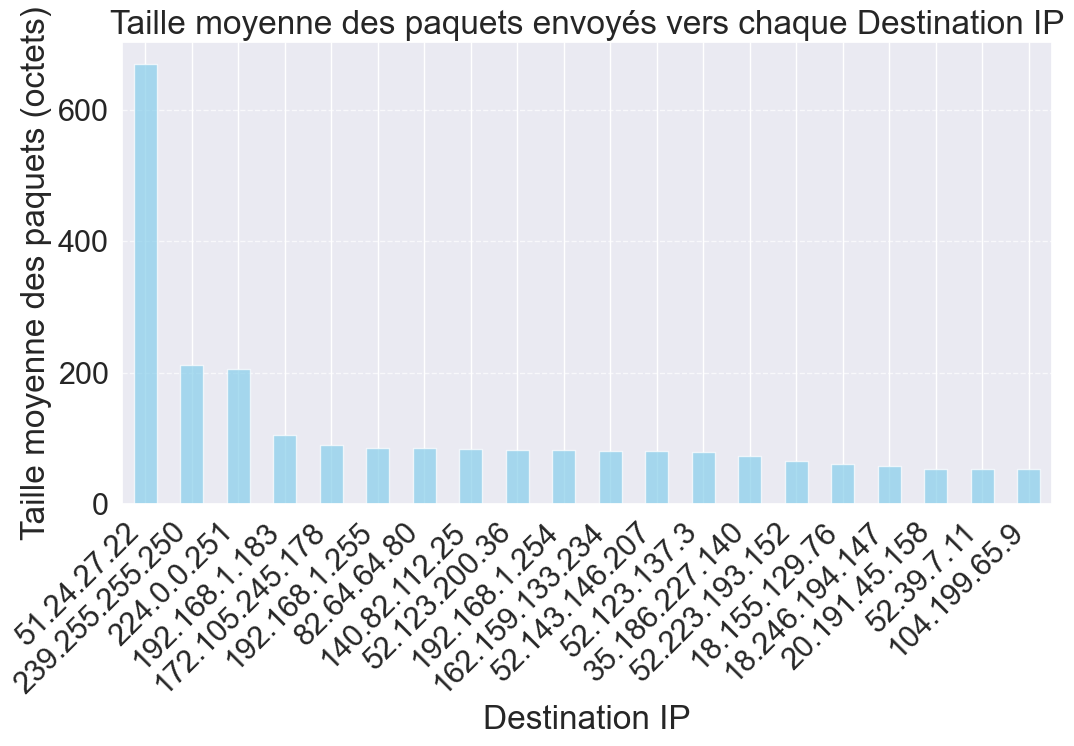

In [50]:
# Calculer la taille moyenne des paquets pour chaque Destination IP
avg_packet_size_per_dst = df_filtered.groupby("Destination IP")["Length"].mean().sort_values(ascending=False)

# Création du graphique en barres
plt.figure(figsize=(12, 6))
avg_packet_size_per_dst.plot(kind="bar", color="skyblue", alpha=0.7)

# Personnalisation du graphique
plt.xlabel("Destination IP")
plt.ylabel("Taille moyenne des paquets (octets)")
plt.title("Taille moyenne des paquets envoyés vers chaque Destination IP")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()


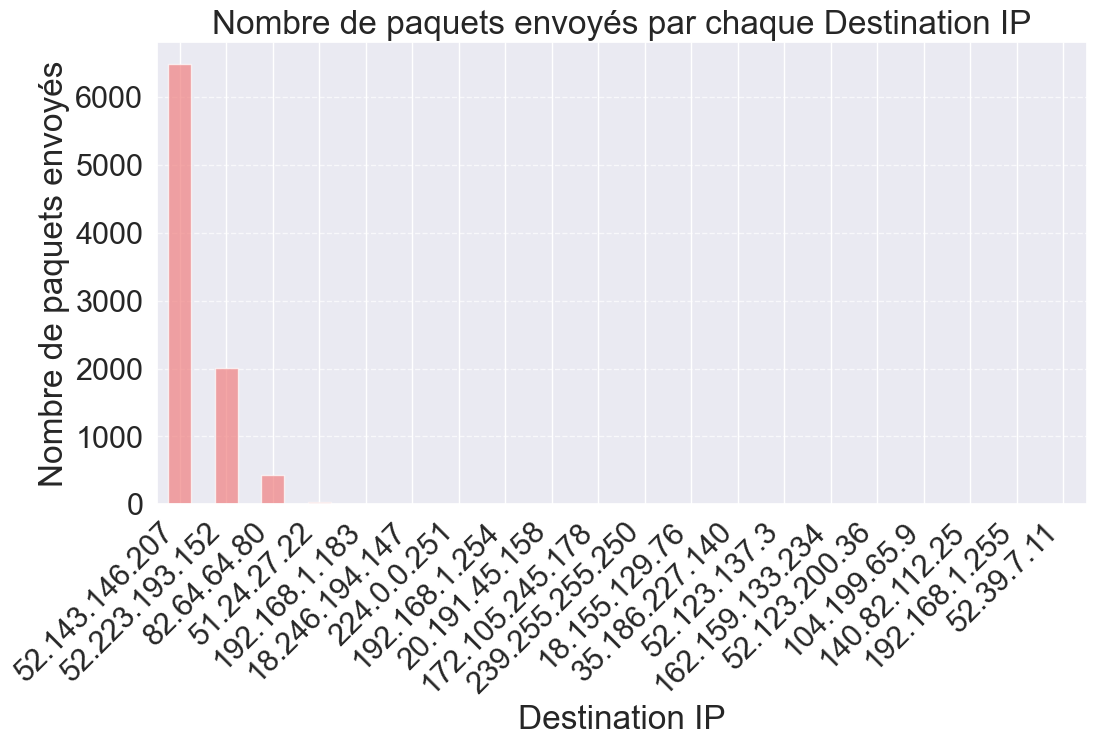

In [53]:
packet_count_per_src = df_filtered["Destination IP"].value_counts().sort_values(ascending=False)

# Création du graphique en barres
plt.figure(figsize=(12, 6))
packet_count_per_src.plot(kind="bar", color="lightcoral", alpha=0.7)

# Personnalisation du graphique
plt.xlabel("Destination IP")
plt.ylabel("Nombre de paquets envoyés")
plt.title("Nombre de paquets envoyés par chaque Destination IP")
plt.xticks(rotation=45, ha="right")  # Rotation des labels pour lisibilité
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()

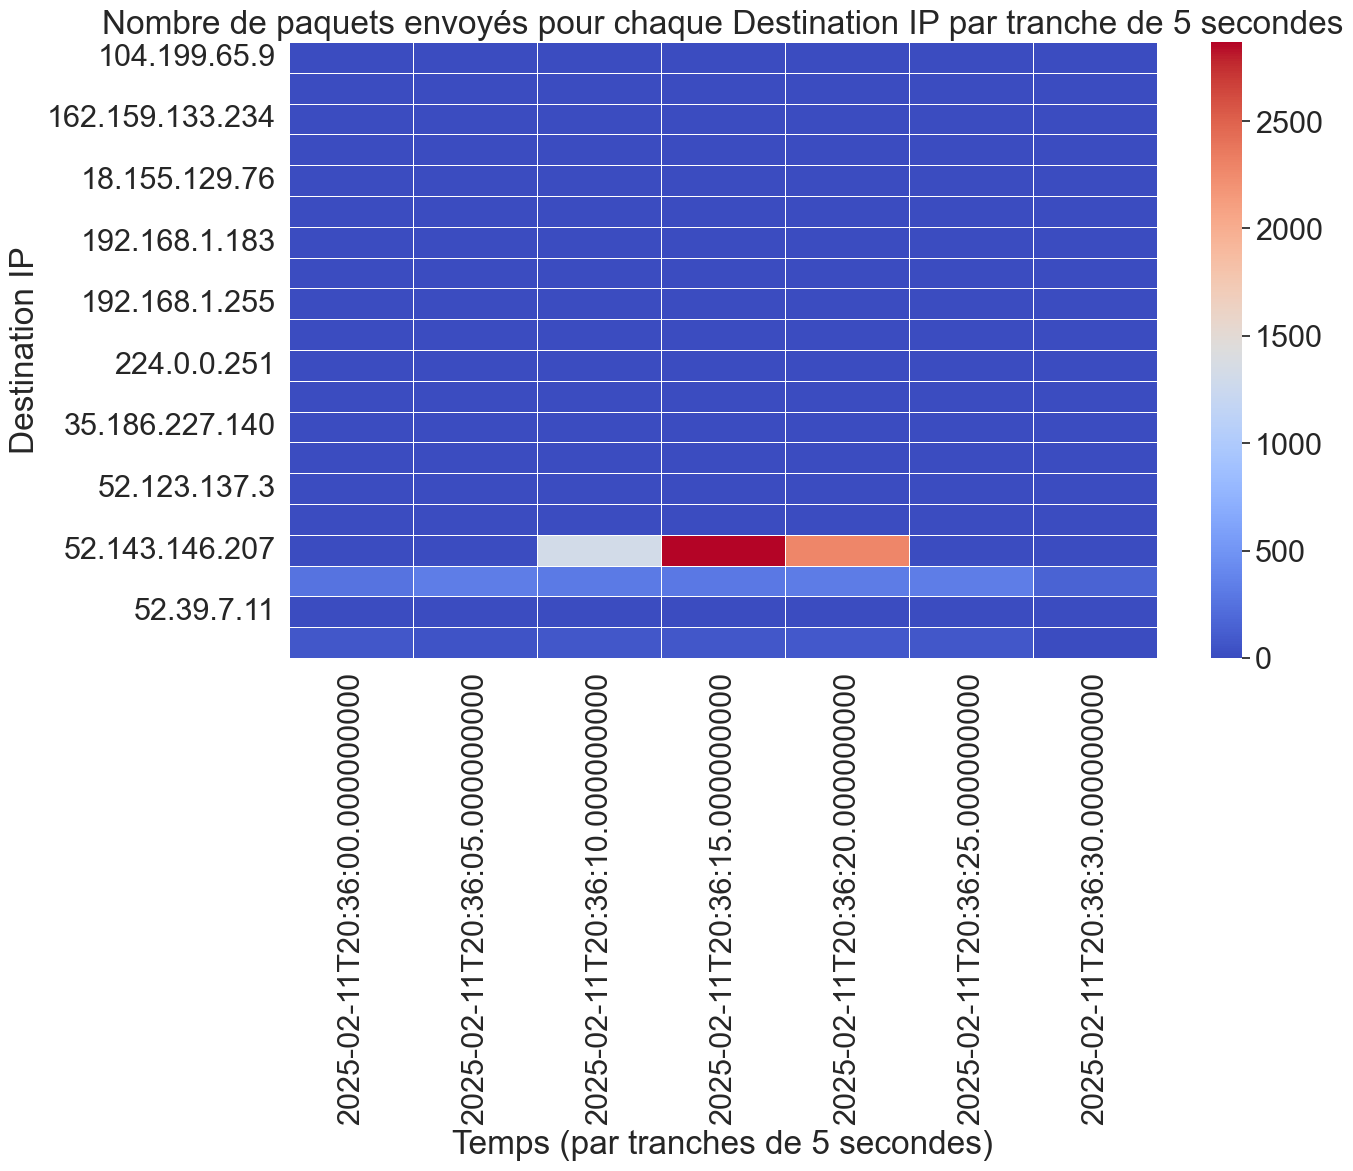

In [56]:
df_filtered["Time Group"] = df_filtered["Time"].dt.floor("5S")

# Compter le nombre de paquets envoyés par Destination IP et par tranche de 5 secondes
heatmap_data = df_filtered.groupby(["Time Group", "Destination IP"]).size().unstack(fill_value=0)

# Création de la heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap="coolwarm", linewidths=0.5)

# Personnalisation du graphique
plt.xlabel("Temps (par tranches de 5 secondes)")
plt.ylabel("Destination IP")
plt.title("Nombre de paquets envoyés pour chaque Destination IP par tranche de 5 secondes")

# Afficher le graphique
plt.show()

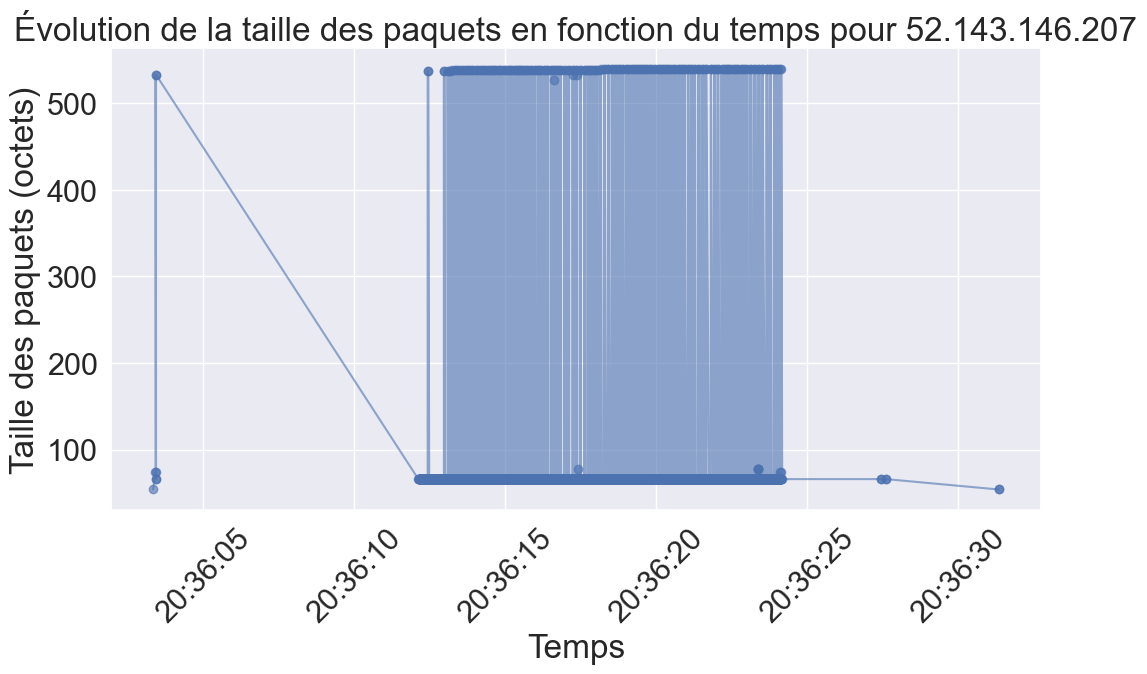

In [60]:
# Définir l'adresse IP de destination spécifique
specific_ip = "52.143.146.207"  # Remplace par l'IP que tu veux analyser

# Filtrer les paquets destinés à cette IP
binome = df_filtered[df_filtered["Destination IP"] == specific_ip]

# Vérifier qu'il y a bien des données après filtrage
if binome.empty:
    print(f"Aucun paquet trouvé pour l'IP {specific_ip}")
else:
    # S'assurer que la colonne "Time" est bien au format datetime
    binome["Time"] = pd.to_datetime(binome["Time"])

    # Trier les données par ordre chronologique
    binome = binome.sort_values(by="Time")

    # Création du graphique en ligne
    plt.figure(figsize=(12, 6))
    plt.plot(binome["Time"], binome["Length"], marker="o", linestyle="-", color="b", alpha=0.6)

    # Personnalisation du graphique
    plt.xlabel("Temps")
    plt.ylabel("Taille des paquets (octets)")
    plt.title(f"Évolution de la taille des paquets en fonction du temps pour {specific_ip}")
    plt.xticks(rotation=45)
    plt.grid(True)

    # Afficher le graphique
    plt.show()


## Scan 2

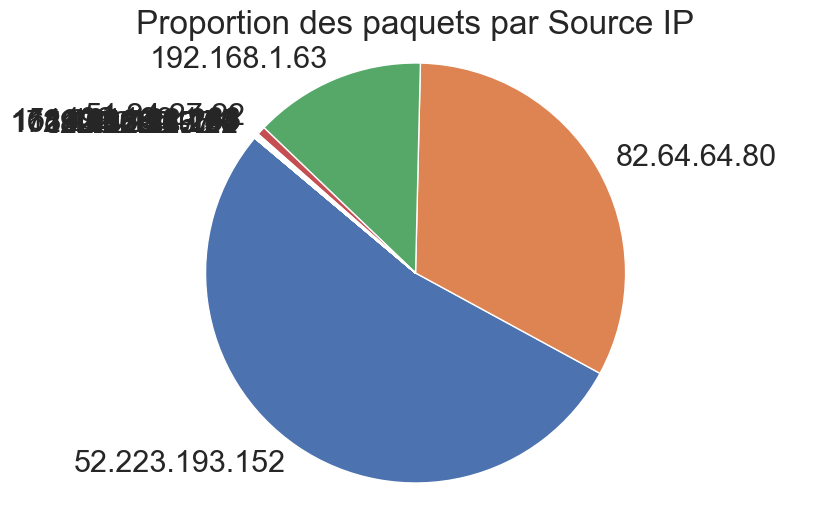

In [37]:
# Compter le nombre de paquets envoyés par chaque Source IP
source_ip_counts = df2["Source IP"].value_counts()

# Créer un graphique en camembert
plt.figure(figsize=(10, 6))
plt.pie(source_ip_counts, labels=source_ip_counts.index, startangle=140)
plt.title("Proportion des paquets par Source IP")
plt.axis('equal')  # Assurer un aspect circulaire

# Afficher le graphique
plt.show()

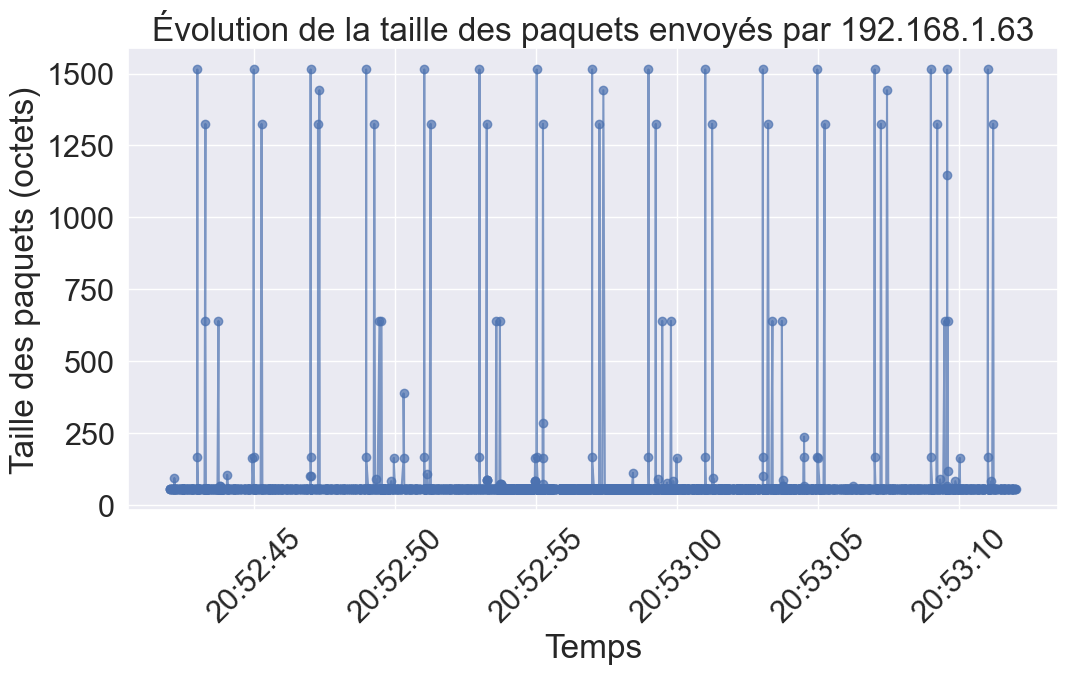

In [46]:
# Définir l'adresse IP source spécifique
specific_ip = "192.168.1.63"  # Remplace par l'IP que tu veux analyser

# Filtrer les paquets envoyés par cette IP
df_filtered2 = df2[df2["Source IP"] == specific_ip]

# Vérifier qu'il y a bien des données après filtrage
if df_filtered.empty:
    print(f"Aucun paquet trouvé pour l'IP {specific_ip}")
else:
    # Trier par temps (au cas où les paquets ne sont pas en ordre)
    df_filtered = df_filtered.sort_values(by="Time")

    # Tracer le graphique
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered["Time"], df_filtered["Length"], marker="o", linestyle="-", color="b", alpha=0.7)
    
    # Personnalisation du graphique
    plt.xlabel("Temps")
    plt.ylabel("Taille des paquets (octets)")
    plt.title(f"Évolution de la taille des paquets envoyés par {specific_ip}")
    plt.xticks(rotation=45)
    plt.grid(True)

    # Afficher le graphique
    plt.show()

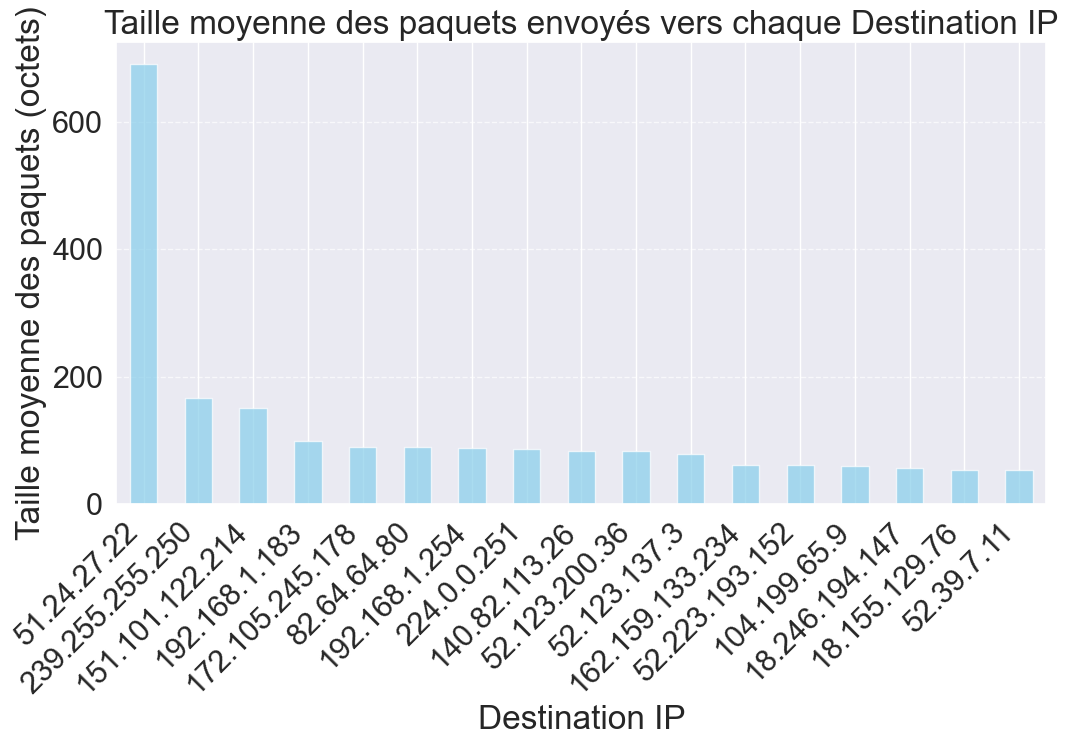

In [47]:
# Calculer la taille moyenne des paquets pour chaque Destination IP
avg_packet_size_per_dst = df_filtered2.groupby("Destination IP")["Length"].mean().sort_values(ascending=False)

# Création du graphique en barres
plt.figure(figsize=(12, 6))
avg_packet_size_per_dst.plot(kind="bar", color="skyblue", alpha=0.7)

# Personnalisation du graphique
plt.xlabel("Destination IP")
plt.ylabel("Taille moyenne des paquets (octets)")
plt.title("Taille moyenne des paquets envoyés vers chaque Destination IP")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()



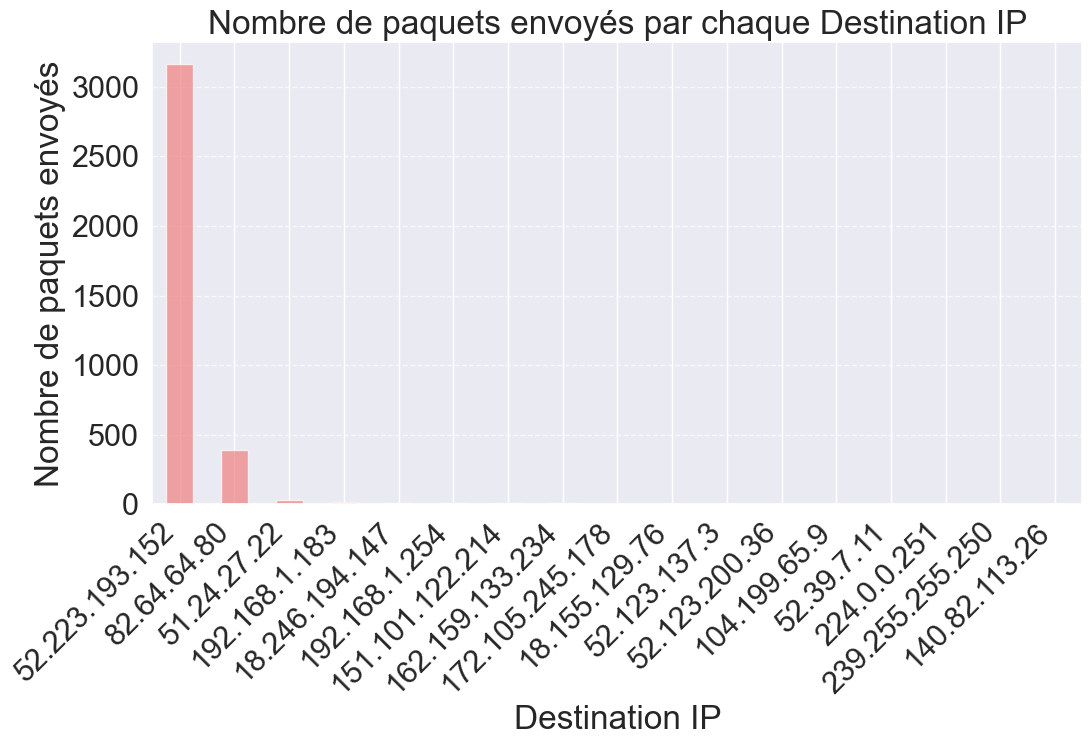

In [ ]:
packet_count_per_src = df_filtered2["Destination IP"].value_counts().sort_values(ascending=False)

# Création du graphique en barres
plt.figure(figsize=(12, 6))
packet_count_per_src.plot(kind="bar", color="lightcoral", alpha=0.7)

# Personnalisation du graphique
plt.xlabel("Destination IP")
plt.ylabel("Nombre de paquets envoyés")
plt.title("Nombre de paquets envoyés pour chaque Destination IP")
plt.xticks(rotation=45, ha="right")  # Rotation des labels pour lisibilité
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()

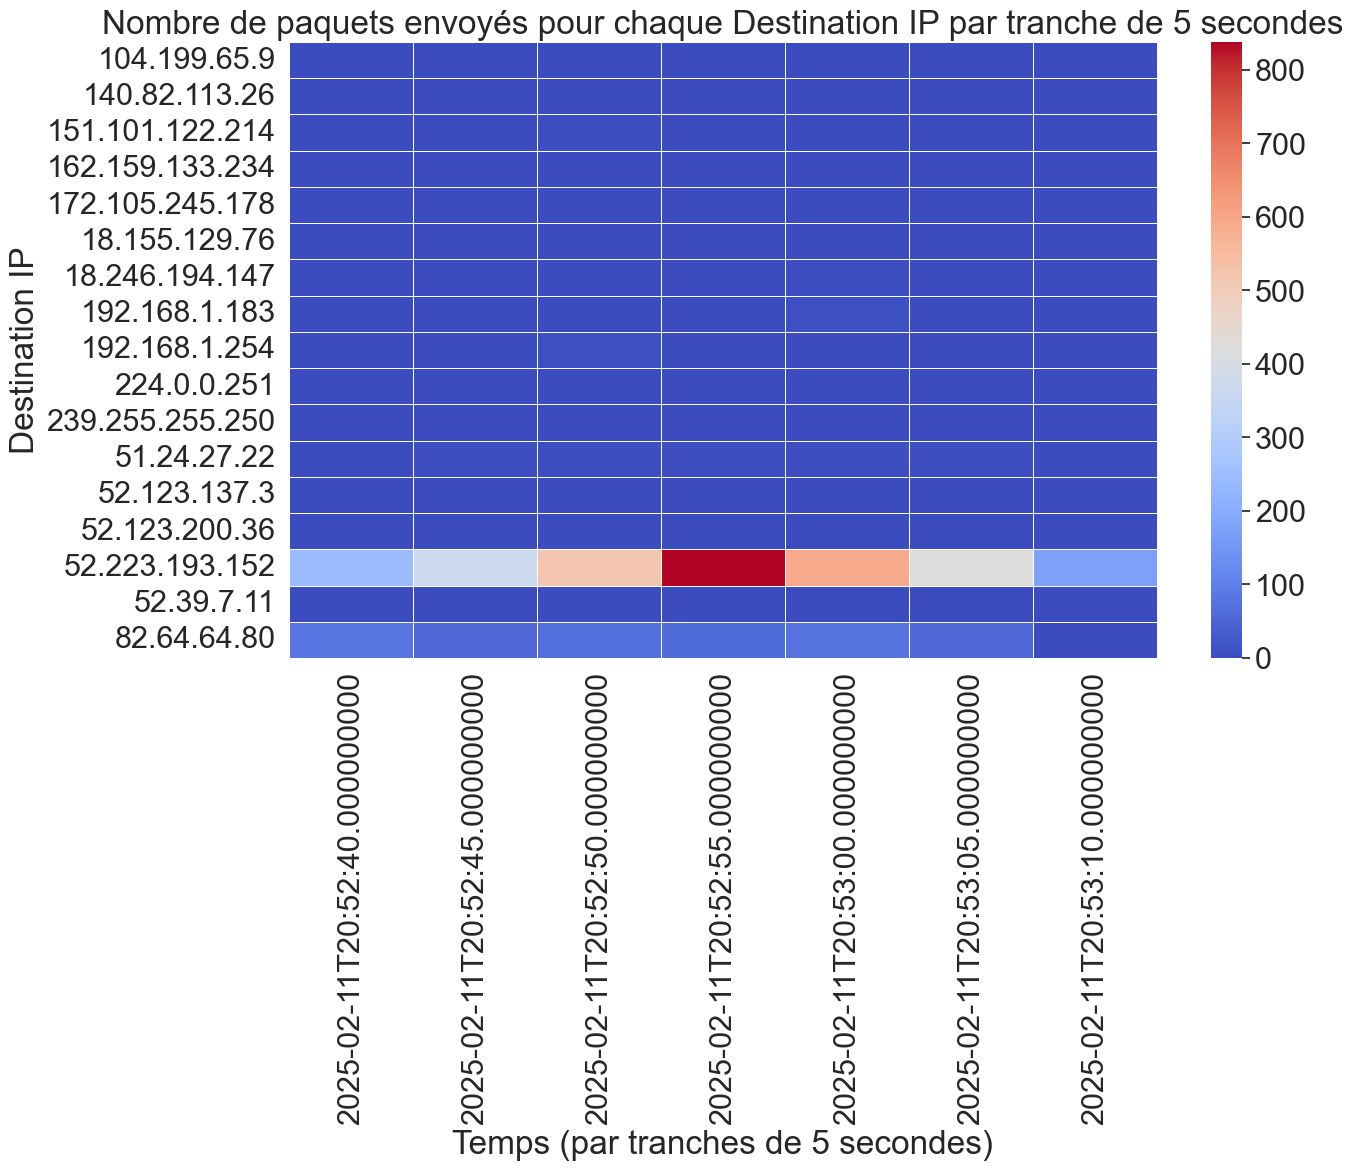

In [57]:
df_filtered2["Time Group"] = df_filtered2["Time"].dt.floor("5S")

# Compter le nombre de paquets envoyés par Destination IP et par tranche de 5 secondes
heatmap_data = df_filtered2.groupby(["Time Group", "Destination IP"]).size().unstack(fill_value=0)

# Création de la heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap="coolwarm", linewidths=0.5)

# Personnalisation du graphique
plt.xlabel("Temps (par tranches de 5 secondes)")
plt.ylabel("Destination IP")
plt.title("Nombre de paquets envoyés pour chaque Destination IP par tranche de 5 secondes")

# Afficher le graphique
plt.show()

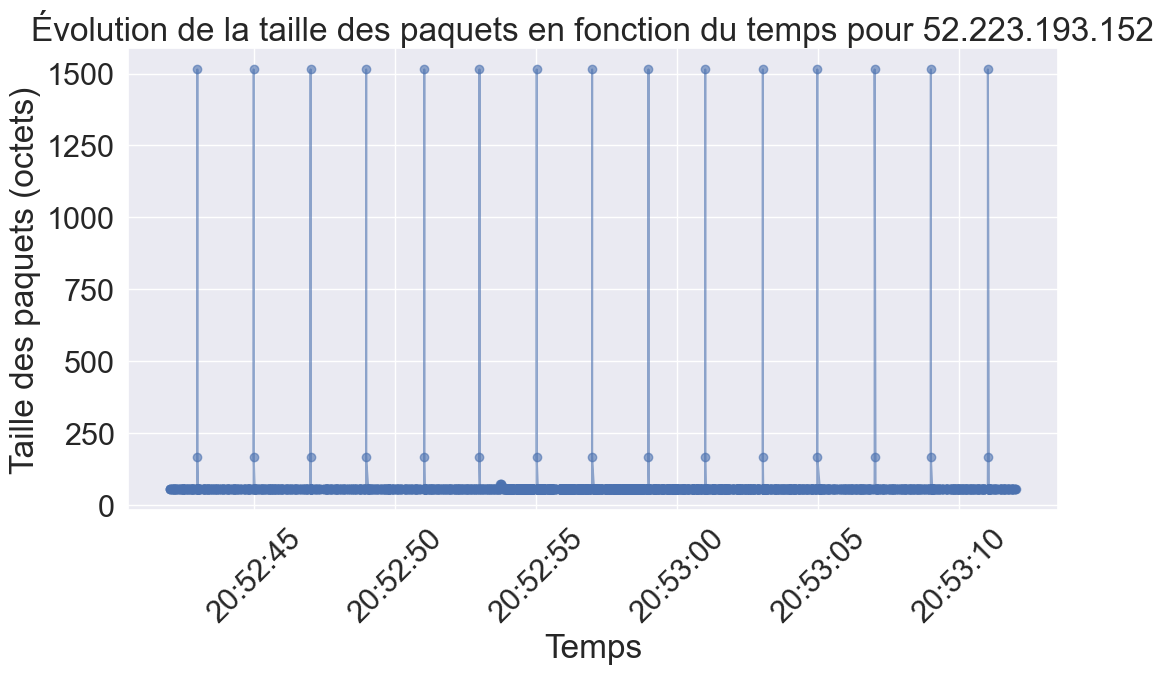

In [62]:
specific_ip = "52.223.193.152"  # Remplace par l'IP que tu veux analyser

# Filtrer les paquets destinés à cette IP
binome = df_filtered2[df_filtered2["Destination IP"] == specific_ip]

# Vérifier qu'il y a bien des données après filtrage
if binome.empty:
    print(f"Aucun paquet trouvé pour l'IP {specific_ip}")
else:
    # S'assurer que la colonne "Time" est bien au format datetime
    binome["Time"] = pd.to_datetime(binome["Time"])

    # Trier les données par ordre chronologique
    binome = binome.sort_values(by="Time")

    # Création du graphique en ligne
    plt.figure(figsize=(12, 6))
    plt.plot(binome["Time"], binome["Length"], marker="o", linestyle="-", color="b", alpha=0.6)

    # Personnalisation du graphique
    plt.xlabel("Temps")
    plt.ylabel("Taille des paquets (octets)")
    plt.title(f"Évolution de la taille des paquets en fonction du temps pour {specific_ip}")
    plt.xticks(rotation=45)
    plt.grid(True)

    # Afficher le graphique
    plt.show()